In [202]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from datetime import datetime
import warnings
warnings.simplefilter("ignore")

In [203]:
df=pd.read_csv("train.csv")

In [204]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.000000,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.000000,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.000000,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.9932

In [205]:
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [206]:
subject = df['subject'].mode()[0]
df['subject'].fillna(subject,inplace=True)

In [207]:
Activity = df['Activity'].mode()[0]
df['Activity'].fillna(subject,inplace=True)

In [208]:
df['angle(X,gravityMean)'] =df['angle(X,gravityMean)'].fillna(0).astype('int64')
df['angle(Y,gravityMean)'] =df['angle(Y,gravityMean)'].fillna(0).astype('int64')
df['angle(Z,gravityMean)'] =df['angle(Z,gravityMean)'].fillna(0).astype('int64')

In [209]:
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [210]:
df["Activity"].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

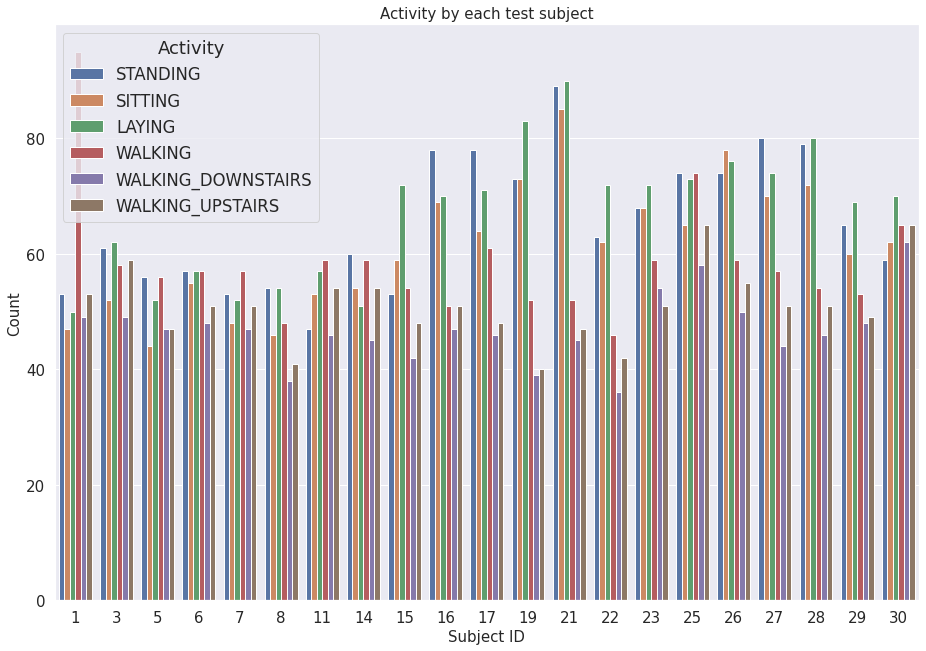

In [211]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = "subject", hue = "Activity", data = df)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

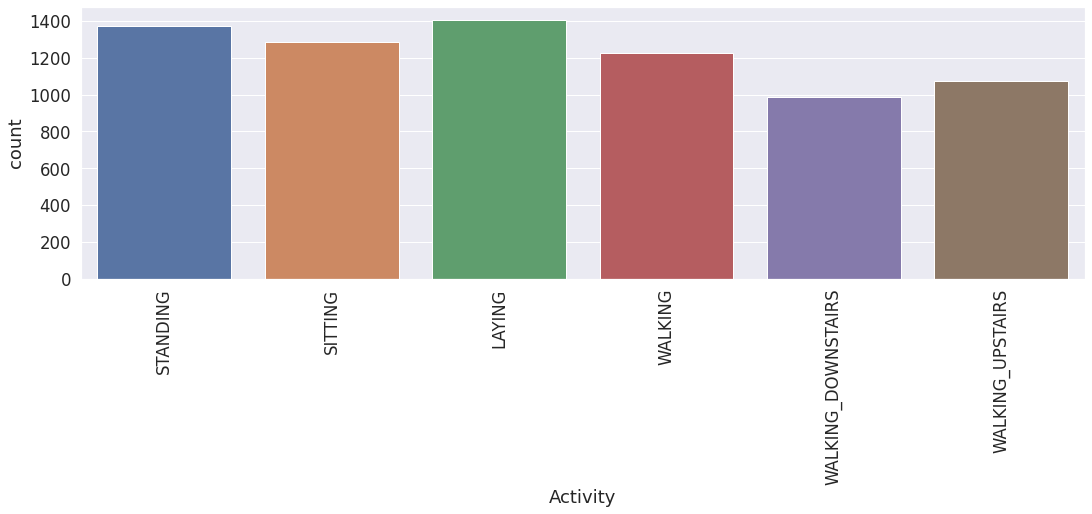

In [212]:
plt.figure(figsize=(18,5))
sns.countplot(df['Activity'])
plt.xticks(rotation=90)
plt.show()  

In [213]:
columns = df.columns

In [214]:
columns = columns.str.replace("[()]", '') 
columns = columns.str.replace("-", '')
columns = columns.str.replace(",", '')
df.columns = columns

In [215]:
df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

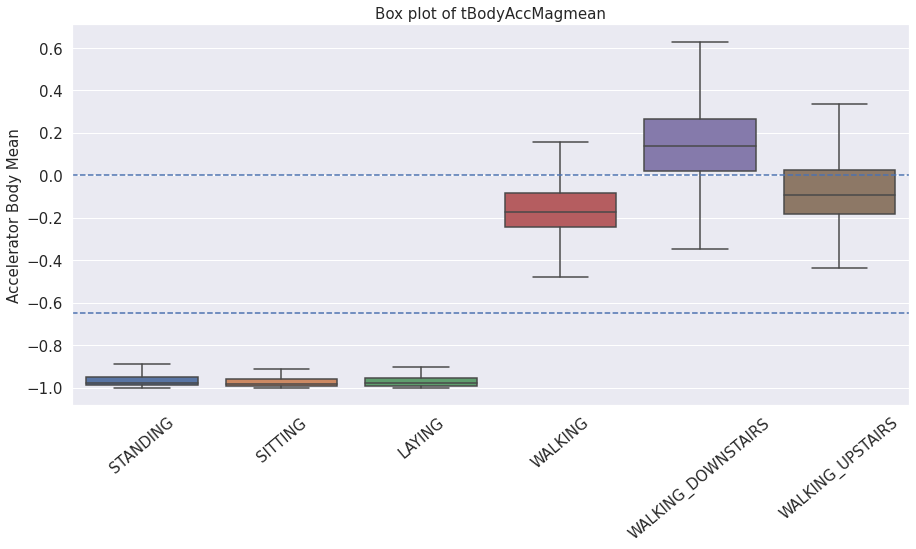

In [216]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "Activity", y = "tBodyAccMagmean", showfliers = False, data = df)
plt.axhline(y = -0.65, linestyle = "--")
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of tBodyAccMagmean", fontsize = 15)
plt.ylabel("Accelerator Body Mean", fontsize = 15)
plt.xlabel("Activity Name", fontsize = 15)
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

In [217]:
X=df.drop(["Activity"],axis=1)

In [218]:
y=df["Activity"]

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)

In [220]:
le = LabelEncoder()
Encoded_y_train = le.fit_transform(y_train)
Encoded_y_test = le.transform(y_test)

In [221]:
mms = MinMaxScaler()
Scaled_X_train = mms.fit_transform(X_train)
Scaled_X_test = mms.transform(X_test)

In [222]:
pca = PCA(n_components=0.9)
X_train_reduced = pca.fit_transform(Scaled_X_train)
X_test_reduced = pca.transform(Scaled_X_test)

In [223]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train_reduced, Encoded_y_train)
y_pred = dtc.predict(X_test_reduced)

In [224]:
accuracy_score(y_pred, Encoded_y_test)

0.86743711760707

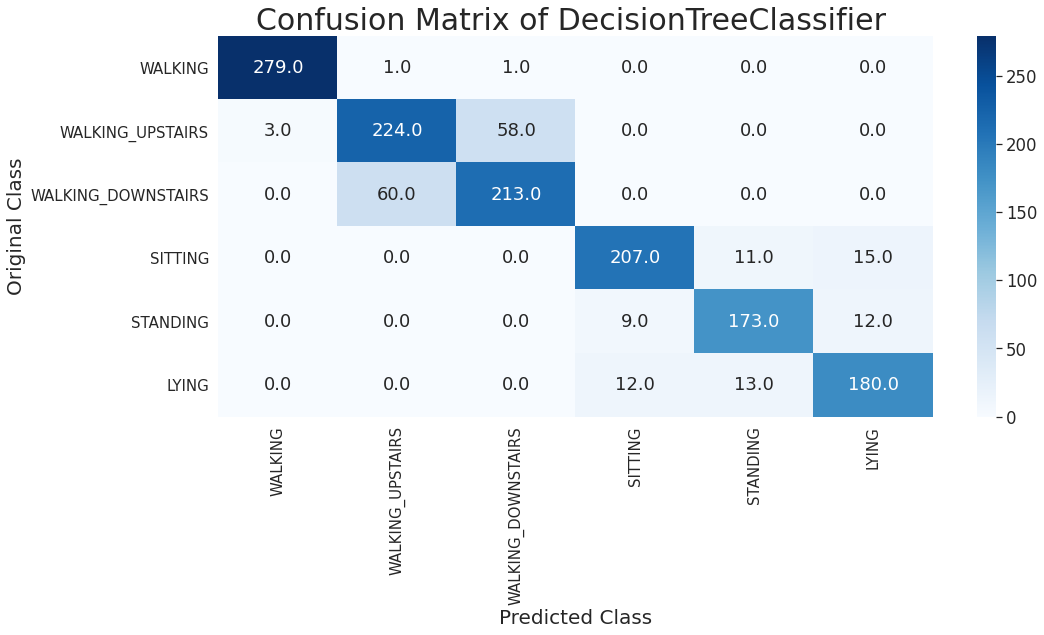

-----------------------------------------------------------------------------------------------------------------------------


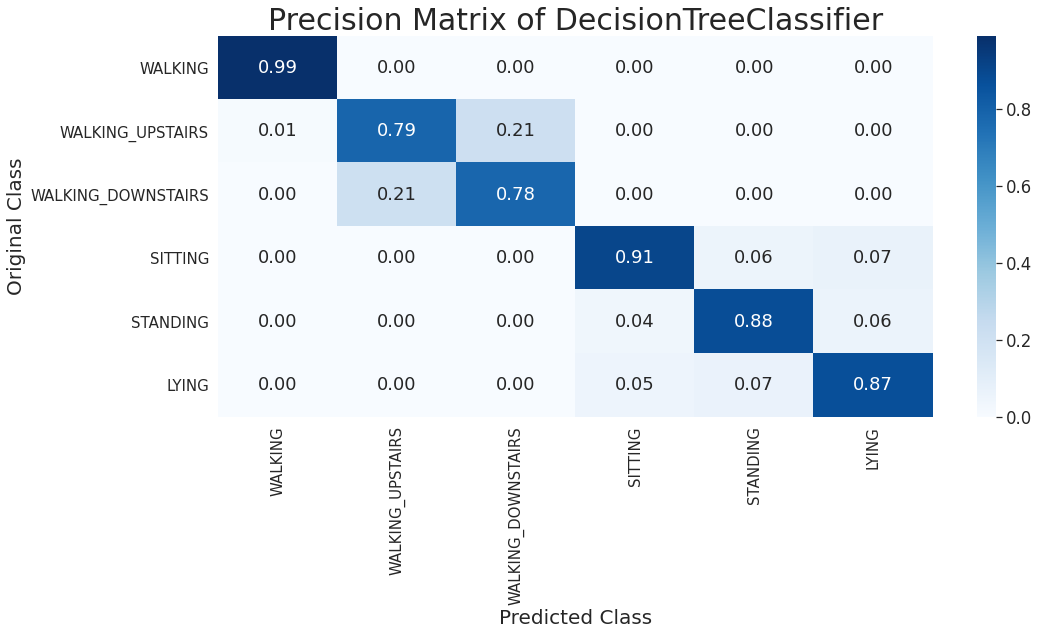

-----------------------------------------------------------------------------------------------------------------------------


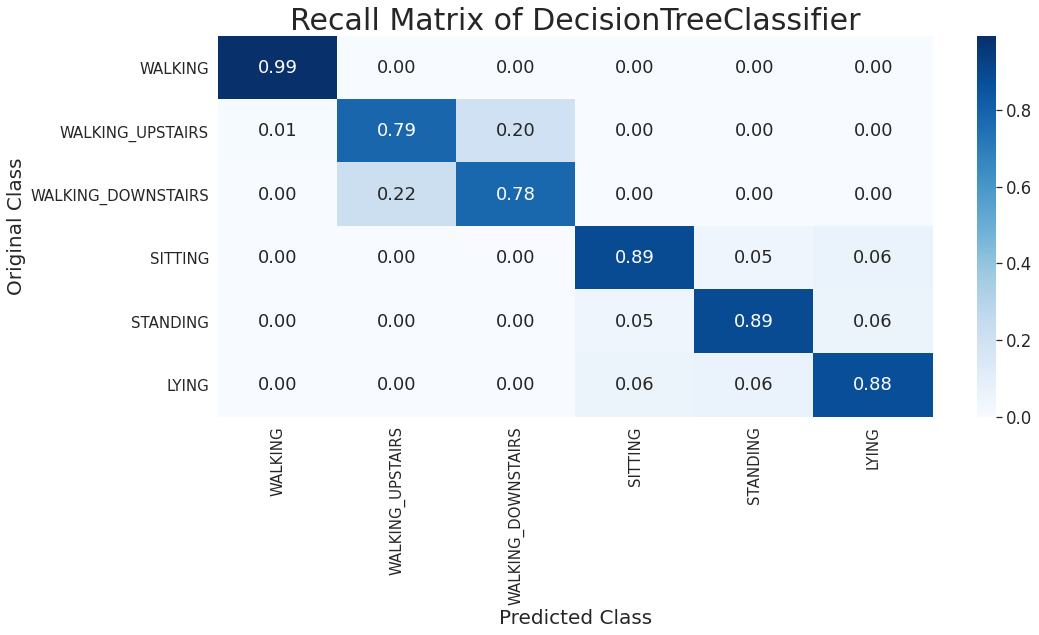

In [225]:
labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
confusionMatx = confusion_matrix(Encoded_y_test, y_pred)
precision = confusionMatx/confusionMatx.sum(axis = 0)

precision = confusionMatx/confusionMatx.sum(axis = 0)
    
recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
sns.set(font_scale=1.5)

plt.figure(figsize=(16,7))
sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix of DecisionTreeClassifier ", fontsize = 30)
plt.xlabel('Predicted Class', fontsize = 20)
plt.ylabel('Original Class', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 90)
plt.show()

print("-"*125)
    
plt.figure(figsize=(16,7))
sns.heatmap(precision, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
plt.title("Precision Matrix of DecisionTreeClassifier", fontsize = 30)
plt.xlabel('Predicted Class', fontsize = 20)
plt.ylabel('Original Class', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 90)
plt.show()
    
print("-"*125)
    
plt.figure(figsize=(16,7))
sns.heatmap(recall, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
plt.title("Recall Matrix of DecisionTreeClassifier", fontsize = 30)
plt.xlabel('Predicted Class', fontsize = 20)
plt.ylabel('Original Class', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [226]:
rfc = RandomForestClassifier()
rfc.fit(X_train_reduced, Encoded_y_train)
rfc_y_pred = rfc.predict(X_test_reduced)

In [227]:
accuracy_score(rfc_y_pred, Encoded_y_test)

0.9360978925900748

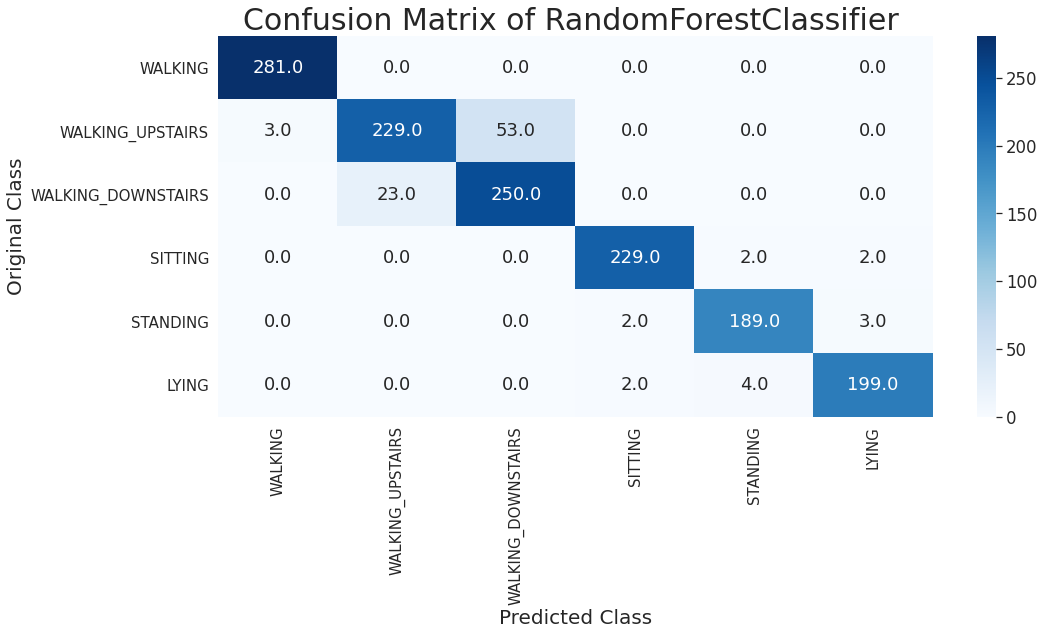

-----------------------------------------------------------------------------------------------------------------------------


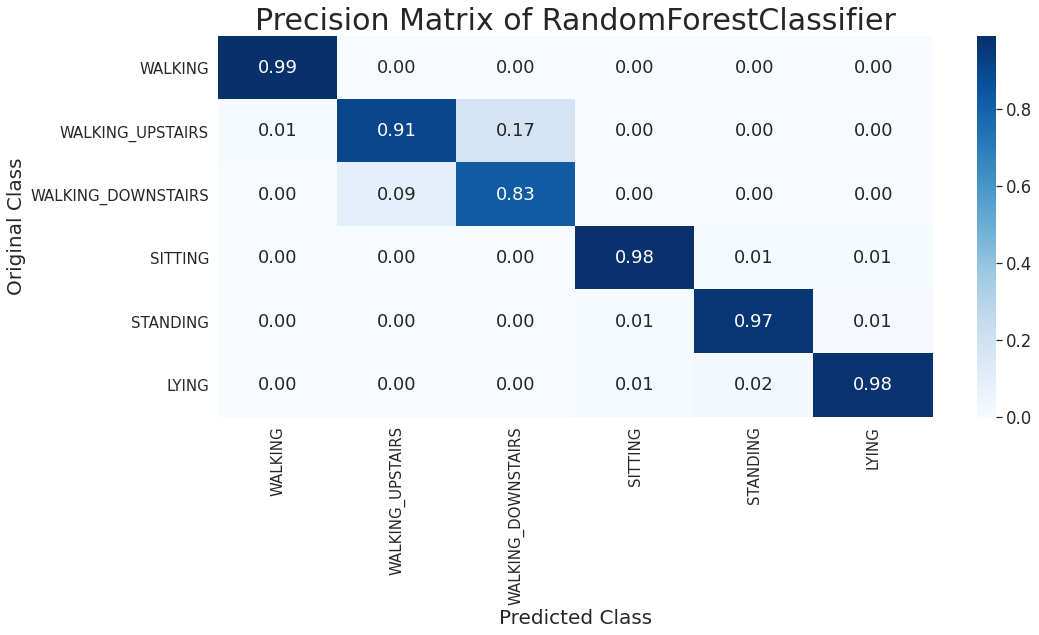

-----------------------------------------------------------------------------------------------------------------------------


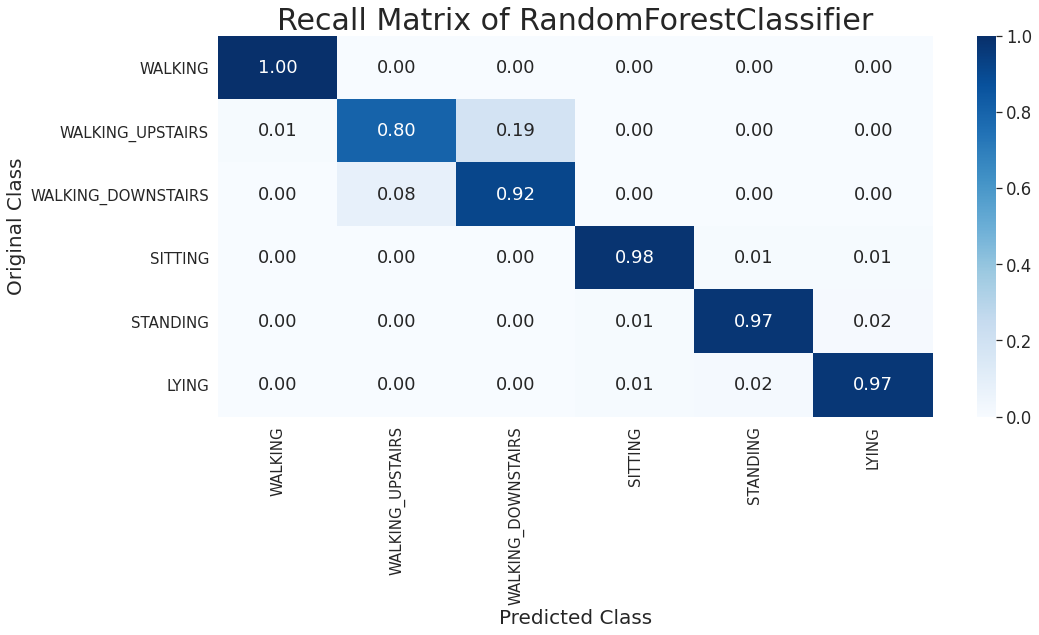

In [228]:
labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
confusionMatx = confusion_matrix(Encoded_y_test, rfc_y_pred)
precision = confusionMatx/confusionMatx.sum(axis = 0)

precision = confusionMatx/confusionMatx.sum(axis = 0)
    
recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
sns.set(font_scale=1.5)

plt.figure(figsize=(16,7))
sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix of RandomForestClassifier ", fontsize = 30)
plt.xlabel('Predicted Class', fontsize = 20)
plt.ylabel('Original Class', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 90)
plt.show()

print("-"*125)
    
plt.figure(figsize=(16,7))
sns.heatmap(precision, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
plt.title("Precision Matrix of RandomForestClassifier", fontsize = 30)
plt.xlabel('Predicted Class', fontsize = 20)
plt.ylabel('Original Class', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 90)
plt.show()
    
print("-"*125)
    
plt.figure(figsize=(16,7))
sns.heatmap(recall, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
plt.title("Recall Matrix of RandomForestClassifier", fontsize = 30)
plt.xlabel('Predicted Class', fontsize = 20)
plt.ylabel('Original Class', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [229]:
print('---------------------------------------------------------------------')
print("DecisionTreeClassifier Accuracy:",accuracy_score(y_pred, Encoded_y_test))
print('---------------------------------------------------------------------')
print("RandomforestClassifier Accuracy:",accuracy_score(rfc_y_pred, Encoded_y_test))
print('---------------------------------------------------------------------')

---------------------------------------------------------------------
DecisionTreeClassifier Accuracy: 0.86743711760707
---------------------------------------------------------------------
RandomforestClassifier Accuracy: 0.9360978925900748
---------------------------------------------------------------------
